In [202]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

## Features Scaling:
- Scaling Variable would be requried specfically those models where calculation are based on distance between different points.
- Scaling is nessacity of KNN(K nearset neighbours) , K-means clustering , Support Vector Machines(SVM), Principal Component Analysis(PCA).
- Not Required for Random Forset, Decision Tree, Bosting Algorithm this all are not affected by outliers, Eg. ***Gradient Bosting***.

### Min Max Scaler:
- formula ---> ***x-min/max-min***
- it is good where distance if requried

In [36]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='clusters')

In [37]:
df.head()

,Var1,Var2
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [38]:
sc1 = MinMaxScaler()
scaled_df = sc1.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df)

In [39]:
scaled_df.head()

,0,1
0,0.066667,1.000000
1,0.266667,0.621622
2,0.000000,0.648649
3,0.111111,0.986486
4,0.244444,0.729730


In [40]:
(25-22)/(67-22) # min-max scaler of var1

0.06666666666666667

In [41]:
(51-5)/(79-5) # min-max scaler of var2

0.6216216216216216

### Standard Scaler:
- Z1 = x1 - meu / sigma(std)

In [43]:
sc2 = StandardScaler()
scaled_df1 = pd.DataFrame(sc2.fit_transform(df))

In [44]:
scaled_df1.head()

,0,1
0,-1.467583,1.587806
1,-0.718533,0.345946
2,-1.717266,0.434651
3,-1.301127,1.543454
4,-0.801761,0.700763


In [45]:
np.mean(df.Var1)

42.63333333333333

In [46]:
np.std(df.Var1)

12.015221827147244

In [47]:
(25-42.633) / 12.015

-1.4675821889305036

In [48]:
np.mean(scaled_df1[0])

1.850371707708594e-17

In [49]:
np.std(scaled_df1[0])

1.0

In [50]:
df_dia = pd.read_excel("CDAC_DataBook.xlsx",sheet_name='diabetes')

In [51]:
diet_dum = pd.get_dummies(df_dia.DietType,prefix='Diet',drop_first=True).astype(int)

In [52]:
df_dia = df_dia.drop('DietType',axis=1)

In [53]:
df_dia = pd.concat([df_dia,diet_dum],axis=1)

In [54]:
df_dia.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diet_2,Diet_3
0,148,72,35,0,33.6,0.63,50,1,0,0
1,85,66,29,0,26.6,0.35,31,0,1,0
2,183,64,0,0,23.3,0.67,32,1,0,0
3,89,66,23,94,28.1,0.17,21,0,0,0
4,137,40,35,168,43.1,2.29,33,1,0,0


In [55]:
x = df_dia.drop('Outcome',axis=1)
y = df_dia.Outcome

In [56]:
info_gain = mutual_info_classif(x,y)

In [57]:
ig_valis = np.array(info_gain)

In [58]:
col_names = np.array(x.columns)
ind = np.flip(np.argsort(ig_valis))

In [59]:
ig_valis = ig_valis[ind]
col_names = col_names[ind]

<BarContainer object of 9 artists>

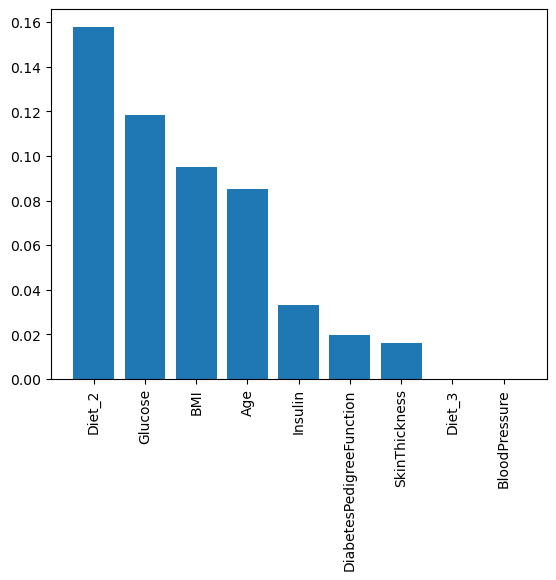

In [60]:
plt.xticks(rotation = 90)
plt.bar(col_names,ig_valis)

- Thresjold Value:
  - Set up the threshold value and if the null values exceeds the threshold value then remove the columns.
- Co-Variance and Std - Dev:
  - If the std-dev is close to zero or equal to zero then all the values are equal then we remove it.
    

In [62]:
res = SelectKBest(k=4).fit(x,y)
d1 = {'Factors':x.columns,"Scores":res.scores_}
Newres = pd.DataFrame(d1)

In [63]:
Newres

,Factors,Scores
0,Glucose,213.161752
1,BloodPressure,3.256950
2,SkinThickness,4.304381
3,Insulin,13.281108
4,BMI,71.772072
5,DiabetesPedigreeFunction,23.853309
6,Age,46.140611
7,Diet_2,319.605967
8,Diet_3,4.476066


In [64]:
ETC = ExtraTreesClassifier()
ETC.fit(x,y)
ETC.feature_importances_
feature_imp = pd.Series(ETC.feature_importances_,index=x.columns)

In [65]:
feature_imp

Glucose                     0.157479
BloodPressure               0.061260
SkinThickness               0.058849
Insulin                     0.054245
BMI                         0.090471
DiabetesPedigreeFunction    0.074218
Age                         0.103654
Diet_2                      0.284337
Diet_3                      0.115487
dtype: float64

In [66]:
ETC.fit(x,y)

ExtraTreesClassifier()

<Axes: >

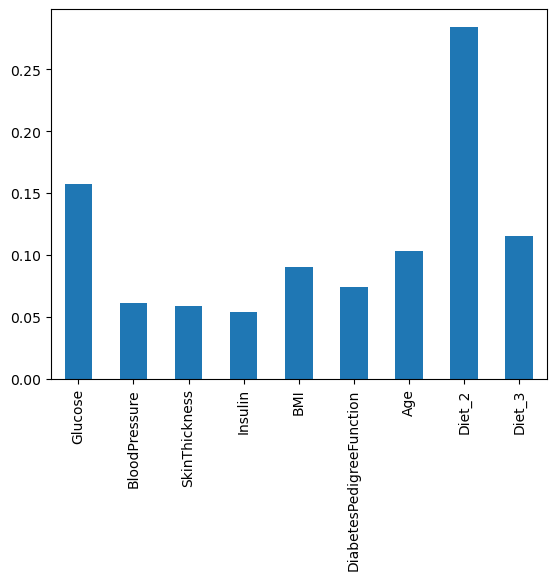

In [67]:
feature_imp.plot(kind='bar')

In [156]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [158]:
df = pd.read_excel('CDAC_Databook.xlsx', sheet_name='diabetes')

In [160]:
diet_dum = pd.get_dummies(df['DietType'], prefix = 'Diet', drop_first=True)
df = df.drop('DietType', axis = 1)
df = pd.concat([df, diet_dum], axis = 1)

In [162]:
x = df.drop('Outcome', axis = 1)
y = df.Outcome


In [164]:
lin1 = LinearRegression()

In [166]:
mod1 = SequentialFeatureSelector(lin1, n_features_to_select=4, direction='forward')

- n_features_to_select --> Select how many features u want to select
- 1st most critical , then 2nd most critical, then 3rd most critical and lastly 4th most critical.

In [169]:
sf = mod1.fit(x,y)

In [170]:
sf

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=4)

In [173]:
sf.get_support()

array([ True, False, False, False,  True, False, False,  True,  True])

In [175]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Diet_2', 'Diet_3'],
      dtype='object')

In [177]:
np.where(sf.get_support())

(array([0, 4, 7, 8], dtype=int64),)

In [180]:
mod2 = SequentialFeatureSelector(lin1, n_features_to_select=4, direction='backward')

In [182]:
sf2 = mod2.fit(x, y)

In [183]:
sf2

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=4)

In [186]:
sf2.get_support()

array([ True, False, False, False,  True, False, False,  True,  True])

In [188]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Diet_2', 'Diet_3'],
      dtype='object')

In [190]:
np.where(sf2.get_support())

(array([0, 4, 7, 8], dtype=int64),)

### Ridge -----> L2 Regularization
- The value of the coeffients  are altered  as per the importance of those feateures

| **Characteristic** | **Ridge Regression** | **Lasso Regression** |
| --- | --- | --- |
| **Penalty Type** | L2 (squared magnitude of coefficients) | L1 (absolute magnitude of coefficients) |
| **Coefficient Shrinkage** | Shrinks coefficients but doesn’t force them to zero | Can shrink some coefficients to exactly zero |
| **Feature Selection** | Does not perform feature selection | Performs feature selection by zeroing out some coefficients |
| **Solution Path** | Coefficients are generally non-zero | Can have many coefficients exactly zero |
| **Model Complexity** | Tends to include all features in the model | Can simplify the model by excluding some features |
| **Impact on Prediction** | Tends to handle multicollinearity well | Can simplify the model which might improve prediction for high-dimensional data |
| **Interpretability** | Less interpretable since all features remain in the model. | More interpretable because it automatically eliminates irrelevant features. |
| **Best for** | Useful when **all features** are relevant and there’s multicollinearity. | Best when the number of predictors is high, and you need to identify the most significant features. |
| **Bias and Variance Tradeoff** | Adds some bias but helps reduce variance. | Similar to Ridge, but potentially more bias due to feature elimination. |
| **Computation** | Generally faster as it doesn’t involve feature selection | May be slower due to the feature selection process |
|  | Coefficients value of unimportant can be brought close to zero | Coefficients values of unimportant features are equal to zero. |
|  | less sensitive to outliers than lasso | more robust to outliers than ridge |

In [195]:
rr = Ridge()
parameters = {'alpha' : [0.001, 0.01, 0.1,1, 10, 15, 20, 50, 100]}
ridgecv = GridSearchCV(rr, parameters)
ridgecv.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 20, 50, 100]})

In [197]:
print(ridgecv.best_params_)

{'alpha': 0.1}


- y_pred = ridgecv.predict(x_test)

### Lasso ----> L1 Regularization

In [205]:
lr = Lasso()
parameters = {'alpha' : [0.001, 0.01, 0.1,1, 10, 15, 20, 50, 100]}
lassocv = GridSearchCV(lr, parameters)
lassocv.fit(x,y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 20, 50, 100]})

In [207]:
print(lassocv.best_params_)

{'alpha': 0.001}


- y_pred = lassocv.predict(x_test)